<a href="https://colab.research.google.com/github/joshtrivedi/Machine-Learning/blob/master/LSTM/LSTM_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [ ]:
from keras import layers
from keras.datasets import imdb
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, SimpleRNN, LSTM, GRU, Bidirectional
from keras import regularizers
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import numpy.random as nr
from tensorflow import set_random_seed
import numpy as np


%matplotlib inline

Using TensorFlow backend.


In [ ]:
max_features = 10000
max_len = 250

old = np.load

In [ ]:
np.load = lambda *a,**k: old(*a,**k)

In [ ]:
(train_text, train_labels), (test_text, test_labels) = imdb.load_data(num_words = max_features)

17465344/17464789 [==============================] - 0s 0us/step


/tensorflow-1.15.2/python3.7/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/tensorflow-1.15.2/python3.7/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
np.load = old
del(old)

In [ ]:
train_text = preprocessing.sequence.pad_sequences(train_text, maxlen = max_len)
test_text = preprocessing.sequence.pad_sequences(test_text, maxlen = max_len)
print(len(train_text))
print(train_text[1])

25000
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    1  194 1153  194 8255   78  228    5    6
 1463 4369 5012  134   26    4  715    8  118 1634   14  394   20   13
  119  954  189  102    5  207  110 3103   21   14   69  188    8   30
   23    7    4  249  126   93    4  114    9 2300 1523    5  647    4
  116    9   35 8163    4  229    9  340 1322    4  118    9    4  130
 4901   19    4 1002    5   89   29  952   46   37    4  455    9   45
   43   38 1543 1905  398    4 1649   26 6853    5  163   11 3215    2
    4 1153    9  194  775    7 8255    2  349 2637  148  605    2 8003
   15  123  125   68    2 6853   15  349  165 4362   98    5    4  228
    9   43    2 1157   15  299  120    5  120  174   11  220  175  136


In [ ]:
embedding = Sequential()
## First add an embedding layer
embedding.add(Embedding(10000, 8, input_length = max_len, embeddings_regularizer = regularizers.l2(0.01)))
## Flatten the embedding of the features
embedding.add(Flatten())
## Now the  binary classifier layer
embedding.add(Dense(1, activation = 'sigmoid'))
embedding.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['acc'])
embedding.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2001      
Total params: 82,001
Trainable params: 82,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nr.seed(3421)
set_random_seed(654)
historyEMB = embedding.fit(train_text, train_labels,
                   epochs = 20,
                   batch_size = 256,
                   validation_data = (test_text, test_labels))


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 64us/step - loss: 0.7554 - acc: 0.5712 - val_loss: 0.6777 - val_acc: 0.6608
Epoch 2/20
25000/25000 [==============================] - 1s 42us/step - loss: 0.6429 - acc: 0.7158 - val_loss: 0.6097 - val_acc: 0.7422
Epoch 3/20
25000/25000 [==============================] - 1s 47us/step - loss: 0.5808 - acc: 0.7735 - val_loss: 0.5602 - val_acc: 0.7831
Epoch 4/20
25000/25000 [==============================] - 1s 46us/step - loss: 0.5412 - acc: 0.8010 - val_loss: 0.5273 - val_acc: 0.8082
Epoch 5/20
25000/25000 [==============================] - 1s 48us/step - loss: 0.5134 - acc: 0.8170 - val_loss: 0.5053 - val_acc: 0.8213
Epoch 6/20
25000/25000 [==============================] - 1s 50us/step - loss: 0.4917 - acc: 0.8300 - val_loss: 0.4850 - val_acc: 0.8326
Epoch 7/20
25000/25000 [==============================] - 1s 44us/step - loss: 0.4731 - acc: 0.8399 - val_loss: 0.4732 - val_ac

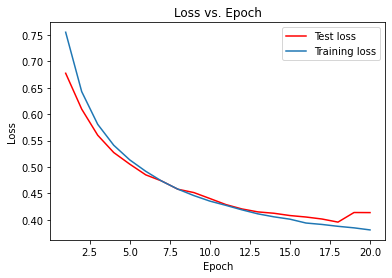

In [ ]:
def plot_loss(history):
    '''Function to plot the loss vs. epoch'''
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'Test loss')
    plt.plot(x, train_loss, label = 'Training loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    
plot_loss(historyEMB)

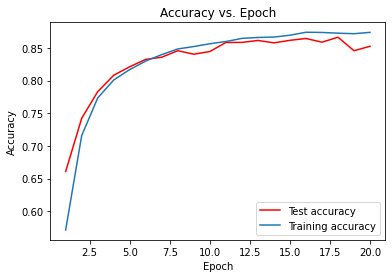

In [ ]:
def plot_accuracy(history):
    train_acc = history.history['acc']
    test_acc = history.history['val_acc']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'Test accuracy')
    plt.plot(x, train_acc, label = 'Training accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    
plot_accuracy(historyEMB)

In [ ]:
RNN1 = Sequential()
## First add an embedding layer
RNN1.add(Embedding(max_features, 32, embeddings_regularizer = regularizers.l2(0.01)))
## Now add an RNN layer
RNN1.add(SimpleRNN(32, kernel_regularizer = regularizers.l2(0.01)))
## And the classifier layer
RNN1.add(Dense(1, activation = 'sigmoid'))
RNN1.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['acc'])
RNN1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nr.seed(6754)
set_random_seed(7766)
historyRNN = RNN1.fit(train_text, train_labels,
                   epochs = 20,
                   batch_size = 1024,
                   validation_data = (test_text, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 10s 383us/step - loss: 1.9153 - acc: 0.5306 - val_loss: 1.1509 - val_acc: 0.5225
Epoch 2/20
25000/25000 [==============================] - 10s 395us/step - loss: 0.9715 - acc: 0.5885 - val_loss: 0.8458 - val_acc: 0.6114
Epoch 3/20
25000/25000 [==============================] - 10s 418us/step - loss: 0.8335 - acc: 0.6396 - val_loss: 0.8055 - val_acc: 0.6494
Epoch 4/20
25000/25000 [==============================] - 10s 387us/step - loss: 0.7811 - acc: 0.6652 - val_loss: 0.8188 - val_acc: 0.5649
Epoch 5/20
25000/25000 [==============================] - 9s 376us/step - loss: 0.7299 - acc: 0.7104 - val_loss: 0.7981 - val_acc: 0.5842
Epoch 6/20
25000/25000 [==============================] - 9s 341us/step - loss: 0.7020 - acc: 0.7206 - val_loss: 0.6622 - val_acc: 0.7390
Epoch 7/20
25000/25000 [==============================] - 10s 397us/step - loss: 0.6658 - acc: 0.7500 - val_loss: 0.60

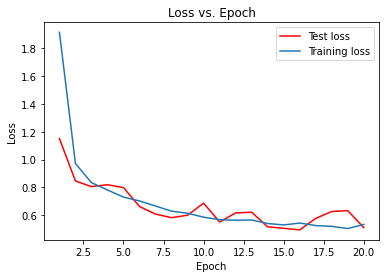

In [ ]:
plot_loss(historyRNN)

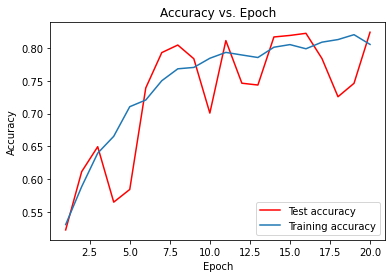

In [ ]:
plot_accuracy(historyRNN)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive #toimport google drive data
drive.mount('/content/drive') #to mount the drive data into colab clound and enterr the activation code

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive"

/content/drive/My Drive


In [ ]:
apple_training_complete=pd.read_csv("NG Machine Learning/yahoofinance.csv")

In [ ]:
apple_training_processed = apple_training_complete.iloc[:, 1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [ ]:
features_set = []
labels = []
for i in range(60, 250):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 0])

In [ ]:
features_set, labels = np.array(features_set), np.array(labels)

In [ ]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

In [ ]:
apple_testing_processed = apple_training_complete.iloc[:, 1:2].values

In [ ]:
apple_total = pd.concat((apple_training_complete['Open'], apple_training_complete['Open']), axis=0)

In [ ]:
test_inputs = apple_total[len(apple_total) - len(apple_training_complete) - 60:].values

In [ ]:
test_inputs

In [ ]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
test_features = []
for i in range(60,250):
    test_features.append(test_inputs[i-60:i, 0])

In [ ]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [ ]:
predictions = model.predict(test_features)

In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [ ]:
from urllib.request import urlopen

In [ ]:
url = "https://www.gutenberg.org/files/11/11-0.txt"
file = urlopen(url)
document=(file.read())

In [ ]:
document

b'\xef\xbb\xbfThe Project Gutenberg eBook of Alice\xe2\x80\x99s Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Alice\xe2\x80\x99s Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: January, 1991 [eBook #11]\r\n[Most recently updated: October 12, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Arthur DiBianca and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ALICE\xe2\x80\x99S ADVENTURES IN WONDERLAND ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [ ]:
document=document.lower()

In [ ]:
# create mapping of unique chars to integers
chars = sorted(list(set(document)))             #set of all distinct characters
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [ ]:
list(set(document))

[128,
 10,
 13,
 148,
 152,
 153,
 156,
 157,
 32,
 33,
 34,
 35,
 36,
 109,
 37,
 39,
 40,
 41,
 42,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 187,
 59,
 185,
 191,
 63,
 195,
 91,
 120,
 93,
 95,
 97,
 98,
 99,
 226,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 100,
 110,
 239,
 112,
 111,
 114,
 115,
 116,
 117,
 118,
 119,
 113,
 121,
 122]

In [ ]:
n_chars = len(document)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

Total Characters:  174313
Total Vocab:  70


In [ ]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = document[i:i + seq_length]
	seq_out = document[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Patterns:  174213


In [ ]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [ ]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
model.fit(X, y, epochs=10, batch_size=128)

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [ ]:
filename = "NG Machine Learning/alice.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()

In [ ]:
# create mapping of unique chars to integers, and a reverse mapping
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)

In [ ]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

In [ ]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
model.fit(X, y, epochs=10, batch_size=128, callbacks=callbacks_list)

In [ ]:
# load the network weights
filename = "weights-improvement-10-2.1507.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
# pick a random seed
generate=""
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("Seed:")
print ("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(1000):
  x = numpy.reshape(pattern, (1, len(pattern), 1))
  x = x / float(n_vocab)
  prediction = model.predict(x, verbose=0)
  index = numpy.argmax(prediction)
  result = int_to_char[index]
  print(result)
  generate+=result
  seq_in = [int_to_char[value] for value in pattern]
  pattern.append(index)
  pattern = pattern[1:len(pattern)]

print(generate)
print ("\nDone.")

In [ ]:
generate